In [10]:
import pandas as pd
# merge features and label
df_meta = pd.read_csv('../../preprocessing/datasets/tracks_with_genre_small.csv')
df_features = pd.read_csv('../../feature_extraction/features/grouped_umap_40_df.csv')

merged_df = df_meta.merge(df_features, on='track_id', how='outer')

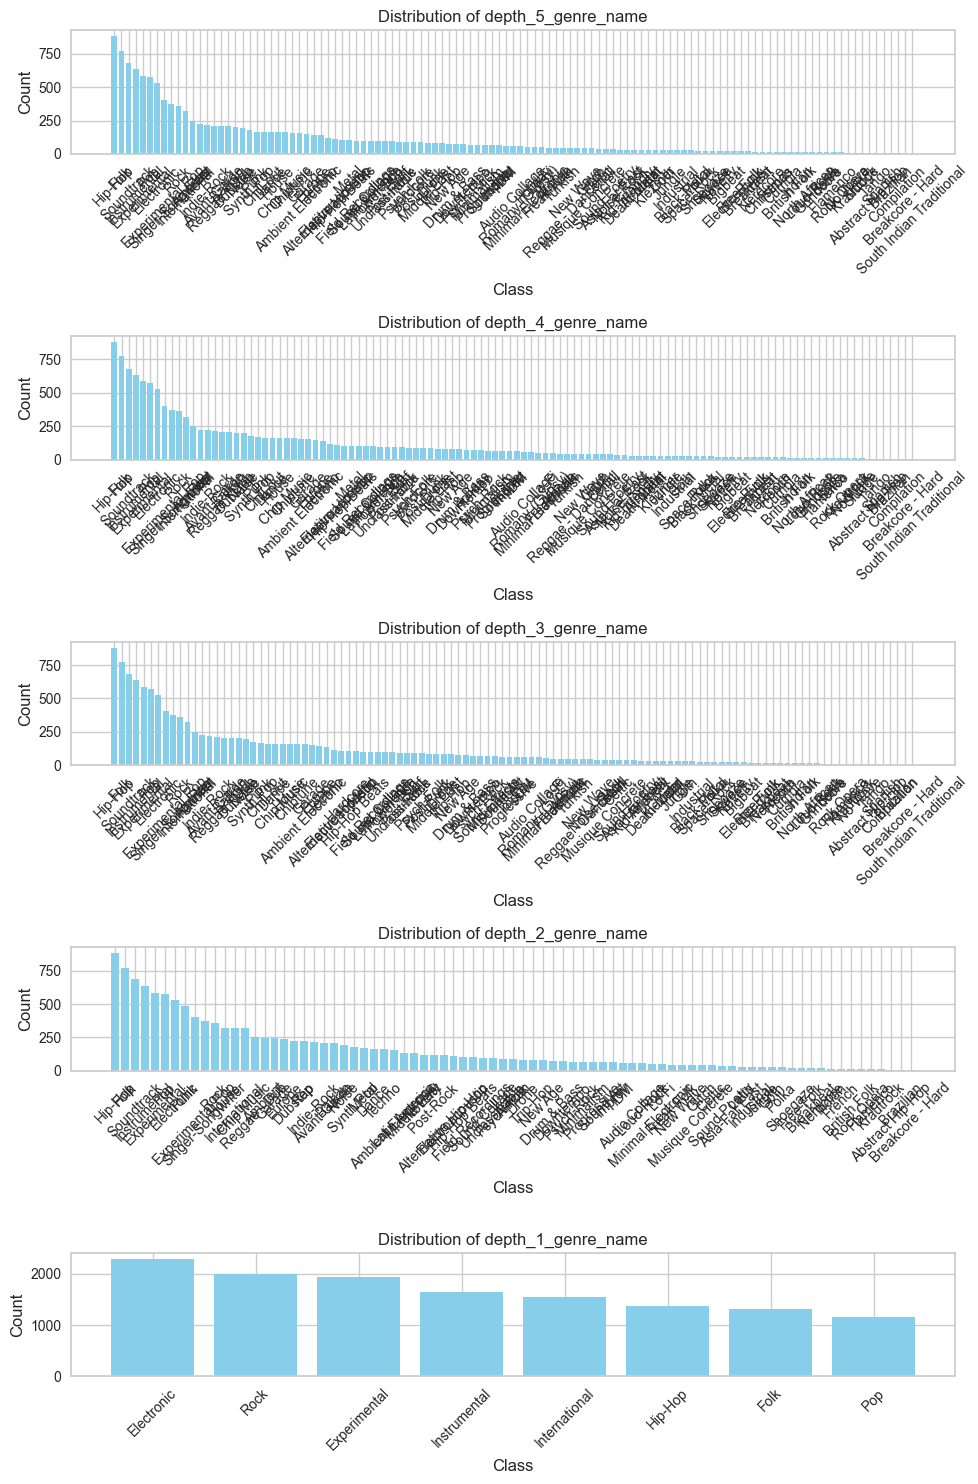

In [11]:

# to check if the dataset is balanced.
import matplotlib.pyplot as plt

def plot_value_counts(ax, column_name, df):
    value_counts = df[column_name].value_counts()
    ax.bar(value_counts.index, value_counts.values, color='skyblue')
    ax.set_title(f'Distribution of {column_name}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

columns_to_plot = ['depth_5_genre_name', 'depth_4_genre_name', 'depth_3_genre_name', 'depth_2_genre_name', 'depth_1_genre_name']

# Create a figure and a 5x1 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

for ax, column in zip(axes, columns_to_plot):
    plot_value_counts(ax, column, df_meta)

plt.tight_layout()  # Adjust layout for better visibility
plt.show()

In [4]:
# remove the value counts() are smaller then 30
# MIN_NUM = 30

# value_counts = merged_df['depth_1_genre_name'].value_counts()

# Get a list of values that have a count less than 30
# to_remove = value_counts[value_counts < MIN_NUM].index

# Filter the DataFrame
# merged_df = merged_df[~merged_df['depth_5_genre_name'].isin(to_remove)]

In [12]:
# Filter columns
LABEL = 'depth_1_genre_name'
excluded_columns = ['Unnamed: 0', 'track_id']
used_columns = [LABEL] + [col for col in df_features.columns if col not in excluded_columns]

# Update merged_df with filtered columns and drop NaN rows
merged_df = merged_df[used_columns].dropna()


In [13]:
merged_df

,depth_1_genre_name,tempo,rms_harmonic,rms_percussive,spectral_centroid,spectral_rolloff,zero_crossings,chroma_stft_1,chroma_stft_2,chroma_stft_3,...,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,MFCC_20,KMeans_umap_Labels
0,Hip-Hop,161.499023,0.060801,0.102429,2975.279504,6088.350559,107473.0,0.747086,0.465628,0.376548,...,6.846233,-6.376837,11.474691,-6.496868,4.351640,-11.482881,0.858946,-5.743586,2.784478,16.0
1,Hip-Hop,99.384014,0.079553,0.085417,2361.216889,5326.953068,65573.0,0.408813,0.578352,0.397881,...,11.691971,0.694524,9.956776,-2.353443,3.412343,-6.521324,1.716783,-3.797788,3.443657,19.0
2,Pop,112.347147,0.135624,0.081036,2319.325849,4256.393704,98089.0,0.283689,0.649424,0.330582,...,5.297867,-9.403314,5.570858,-7.896959,1.831656,-5.827612,5.577751,-3.469359,6.202434,1.0
3,Folk,107.666016,0.060838,0.015485,1680.622215,3679.342224,28713.0,0.243197,0.271314,0.365060,...,0.507389,-8.884753,4.870484,-10.186780,3.072841,-6.979950,0.914813,-7.929453,0.331834,10.0
4,Folk,117.453835,0.089626,0.023680,1611.748689,3238.053335,40485.0,0.164148,0.153275,0.242921,...,-1.830327,-6.346319,4.617892,-3.517620,6.454854,-1.449563,4.338287,-9.859125,0.000951,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13241,Hip-Hop,95.703125,0.043529,0.038739,2516.126806,4816.523857,73309.0,0.245149,0.214317,0.431575,...,5.354173,-3.782389,-0.081591,-8.828883,-6.053892,-12.154242,3.366581,6.014837,10.080020,35.0
13242,Pop,112.347147,0.154175,0.014556,1314.783898,2654.254561,25381.0,0.555326,0.393371,0.434477,...,1.565229,0.295840,12.846233,3.654693,11.319419,-2.069091,0.380289,1.251310,10.351430,6.0
13243,Pop,99.384014,0.107381,0.036098,2137.244018,4547.750786,59488.0,0.240214,0.272419,0.393485,...,1.829649,-6.943891,4.559088,-11.470902,-1.124343,-9.202691,0.693413,-9.078904,0.725152,29.0
13244,Hip-Hop,135.999178,0.238354,0.039858,478.716275,713.422874,11431.0,0.362124,0.499587,0.346402,...,4.131741,2.504650,4.873438,4.346790,7.107062,5.319589,6.435853,6.282990,4.508613,6.0


In [14]:
from pycaret.classification import *

In [18]:
exp_clf = setup(data = merged_df, target = LABEL, max_encoding_ohe=40, categorical_features = ['KMeans_umap_Labels'], session_id=123, normalize=True) 

,Description,Value
0,Session id,123
1,Target,depth_1_genre_name
2,Target type,Multiclass
3,Target mapping,"Electronic: 0, Experimental: 1, Folk: 2, Hip-Hop: 3, Instrumental: 4, International: 5, Pop: 6, Rock: 7"
4,Original data shape,"(13238, 40)"
5,Transformed data shape,"(13238, 79)"
6,Transformed train set shape,"(9266, 79)"
7,Transformed test set shape,"(3972, 79)"
8,Numeric features,38
9,Categorical features,1


In [19]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7382,0.9461,0.7382,0.7317,0.7316,0.6978,0.6987,0.6720
lightgbm,Light Gradient Boosting Machine,0.7349,0.9399,0.7349,0.7283,0.7273,0.6938,0.6950,4.0990
et,Extra Trees Classifier,0.7268,0.9526,0.7268,0.7236,0.7183,0.6847,0.6863,0.2110
rf,Random Forest Classifier,0.7239,0.9445,0.7239,0.7225,0.7122,0.6807,0.6831,0.4240
dt,Decision Tree Classifier,0.6599,0.8051,0.6599,0.6555,0.6561,0.6078,0.6082,0.0770
gbc,Gradient Boosting Classifier,0.6057,0.8865,0.6057,0.5972,0.5946,0.5445,0.5462,8.3550
knn,K Neighbors Classifier,0.5129,0.8361,0.5129,0.5067,0.5053,0.4378,0.4391,0.0510
lr,Logistic Regression,0.5002,0.8331,0.5002,0.4836,0.4837,0.4224,0.4244,0.1280
ridge,Ridge Classifier,0.4662,0.0000,0.4662,0.4613,0.4438,0.3822,0.3858,0.0290
lda,Linear Discriminant Analysis,0.4647,0.8153,0.4647,0.4623,0.4607,0.3845,0.3852,0.0610


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [11]:
model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7109,0.9395,0.7109,0.7050,0.7050,0.6662,0.6672
1,0.7260,0.9432,0.7260,0.7216,0.7209,0.6837,0.6845
2,0.7508,0.9563,0.7508,0.7460,0.7461,0.7128,0.7135
3,0.7476,0.9451,0.7476,0.7365,0.7384,0.7085,0.7095
4,0.7184,0.9393,0.7184,0.7078,0.7102,0.6748,0.6757
5,0.7540,0.9507,0.7540,0.7511,0.7512,0.7164,0.7167
6,0.7711,0.9554,0.7711,0.7673,0.7678,0.7362,0.7365
7,0.7441,0.9468,0.7441,0.7360,0.7361,0.7043,0.7055
8,0.7279,0.9341,0.7279,0.7195,0.7213,0.6859,0.6866


In [12]:
print(model)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [15]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7260,0.9392,0.7260,0.7201,0.7190,0.6838,0.6847
1,0.7465,0.9475,0.7465,0.7410,0.7398,0.7072,0.7083
2,0.7551,0.9568,0.7551,0.7476,0.7486,0.7177,0.7185
3,0.7379,0.9476,0.7379,0.7294,0.7297,0.6974,0.6984
4,0.7314,0.9397,0.7314,0.7239,0.7239,0.6897,0.6907
5,0.7508,0.9516,0.7508,0.7460,0.7453,0.7123,0.7131
6,0.7700,0.9567,0.7700,0.7654,0.7653,0.7348,0.7353
7,0.7419,0.9482,0.7419,0.7334,0.7338,0.7020,0.7031
8,0.7181,0.9390,0.7181,0.7088,0.7100,0.6747,0.6756


Fitting 10 folds for each of 10 candidates, totalling 100 fits


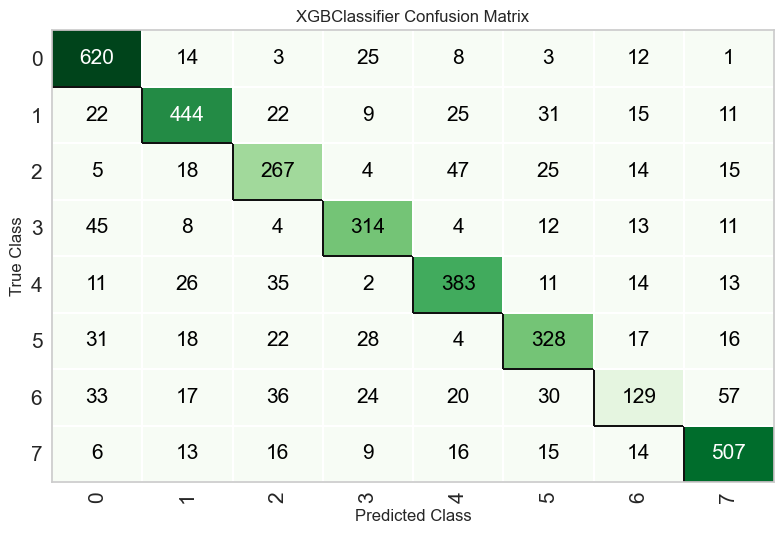

In [16]:
plot_model(tuned_model, plot = 'confusion_matrix')

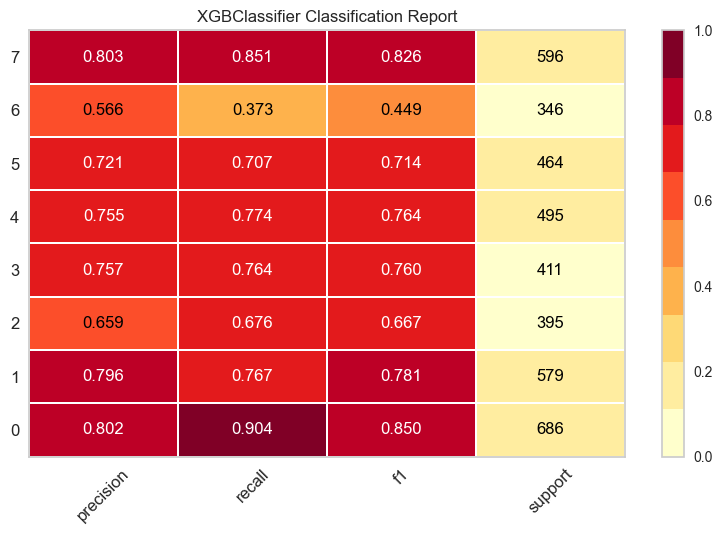

In [18]:
plot_model(tuned_model, plot = 'class_report')

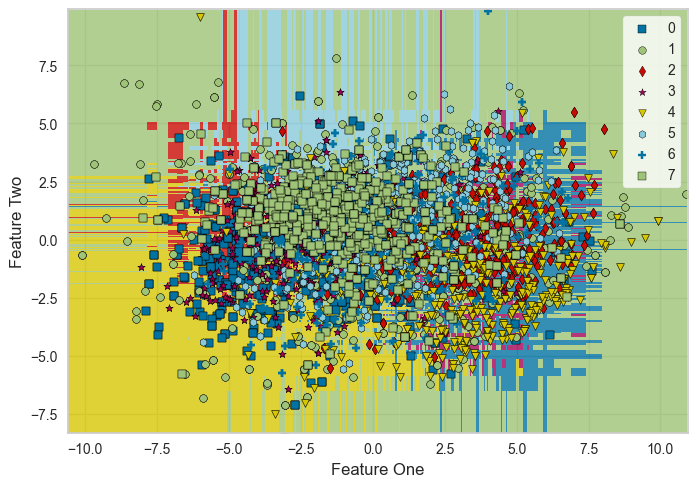

In [19]:
plot_model(tuned_model, plot = 'boundary')

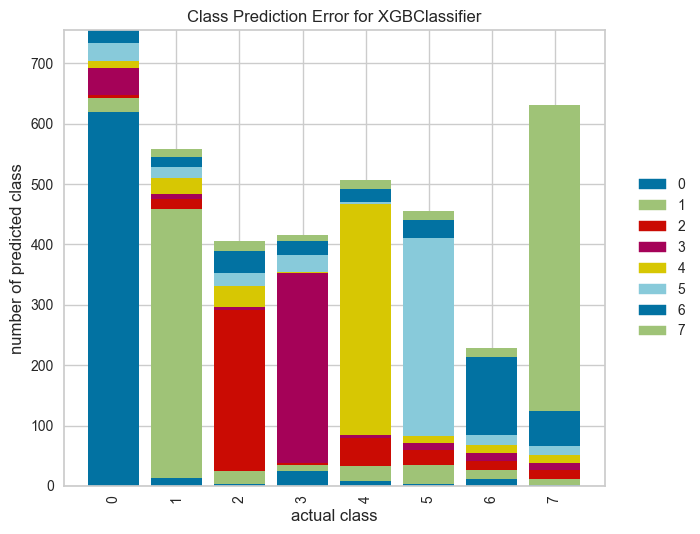

In [20]:
plot_model(tuned_model, plot = 'error')

In [21]:
predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7533,0.9536,0.7533,0.7466,0.7475,0.7154,0.7160


,tempo,rms_harmonic,rms_percussive,spectral_centroid,spectral_rolloff,zero_crossings,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,...,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,MFCC_20,depth_1_genre_name,prediction_label,prediction_score
63,123.046875,0.224589,0.154486,3187.874023,5913.945312,104693.0,0.764233,0.754627,0.668069,0.563142,...,9.907542,-4.829638,11.079276,-3.877869,8.164540,-6.482238,6.966448,1,Electronic,0.4712
3560,143.554688,0.121176,0.033038,1245.610962,2473.791504,36815.0,0.326708,0.350603,0.254619,0.346587,...,1.216699,-3.086263,-1.621175,-6.469046,-1.430883,-4.854597,1.503951,6,Folk,0.3760
5916,123.046875,0.016334,0.023873,1291.789795,2745.550049,37319.0,0.372220,0.381274,0.321369,0.361640,...,6.201792,-3.522608,-0.278993,1.183581,-4.208219,-10.547853,-4.889065,1,Experimental,0.9367
6862,123.046875,0.212254,0.160474,3645.966064,7262.339355,134223.0,0.437102,0.380146,0.352258,0.428491,...,12.757250,-3.543784,9.348560,-6.056295,5.137084,-11.098146,7.853500,3,Electronic,0.5662
5218,151.999084,0.253060,0.126252,2907.757812,5958.692871,92583.0,0.727091,0.446907,0.381326,0.446160,...,11.344790,-1.834550,7.169338,-5.354517,-0.086764,-0.459084,17.034941,3,Hip-Hop,0.5034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3288,92.285156,0.143673,0.087112,1969.370850,4205.704590,49672.0,0.623322,0.388358,0.377277,0.484310,...,8.601514,2.409948,5.631641,-2.690262,5.285307,-0.267487,3.352588,5,Hip-Hop,0.6595
8383,92.285156,0.271619,0.153297,2815.478760,5612.763672,95959.0,0.422300,0.393818,0.416678,0.453106,...,-5.753411,-10.724652,0.111670,-15.569588,-1.529112,-12.425333,1.342054,7,Rock,0.9711
6904,117.453835,0.136277,0.081426,2317.013916,5213.033691,60829.0,0.334492,0.319073,0.369115,0.368321,...,2.655356,-5.702856,2.043272,-7.508913,4.031471,-4.527589,5.813442,3,Hip-Hop,0.8958
1164,129.199219,0.088463,0.062856,2734.245361,5921.431152,76592.0,0.310594,0.400294,0.433544,0.454520,...,2.000657,-8.755143,6.766582,-5.391479,5.161662,-0.973202,5.247947,6,Electronic,0.7036


In [23]:
final_model = finalize_model(tuned_model)
save_model(final_model, 'xgboost_model_20231021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tempo', 'rms_harmonic',
                                              'rms_percussive',
                                              'spectral_centroid',
                                              'spectral_rolloff',
                                              'zero_crossings', 'chroma_stft_1',
                                              'chroma_stft_2', 'chroma_stft...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=0.15,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_one